# COVID-19 data visualizations
This notebook aims to better understand data of the spreading of the novel coronavirus (2019-nCoV) using visualization. 
As of 2/11/2020, the virus is officially named COVID-19 by the World Health Organization. It is a contagious respiratory virus that first started in Wuhan in December 2019. 

Data: https://github.com/CSSEGISandData/COVID-19. Thank you to Johns Hopkins for providing the data!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load timeseries for all countries (and regions). Updated daily.

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
## reshape data
confirmed_df = confirmed_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='confirmed')
deaths_df = deaths_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='deaths')
recoveries_df = recoveries_df.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name='recoveries')

In [4]:
# switch to better date/time format
confirmed_df['date'] = pd.to_datetime(confirmed_df['date'])
deaths_df['date'] = pd.to_datetime(deaths_df['date'])
recoveries_df['date'] = pd.to_datetime(recoveries_df['date'])

In [5]:
# Display per country
confirmed_df.groupby(['Country/Region', 'date']).sum()

Lat   Long  confirmed
Country/Region date                              
Afghanistan    2020-01-22  33.0   65.0          0
               2020-01-23  33.0   65.0          0
               2020-01-24  33.0   65.0          0
               2020-01-25  33.0   65.0          0
               2020-01-26  33.0   65.0          0
               2020-01-27  33.0   65.0          0
               2020-01-28  33.0   65.0          0
               2020-01-29  33.0   65.0          0
               2020-01-30  33.0   65.0          0
               2020-01-31  33.0   65.0          0
               2020-02-01  33.0   65.0          0
               2020-02-02  33.0   65.0          0
               2020-02-03  33.0   65.0          0
               2020-02-04  33.0   65.0          0
               2020-02-05  33.0   65.0          0
               2020-02-06  33.0   65.0          0
               2020-02-07  33.0   65.0          0
               2020-02-08  33.0   65.0          0
               2020-02-09  33.0   65.0          0
               2020-02-10  33.0   65.0          0
               2020-02-11  33.0   65.0          0
               2020-02-12  33.0   65.0          0
               2020-02-13  33.0   65.0          0
               2020-02-14  33.0   65.0          0
               2020-02-15  33.0   65.0          0
               2020-02-16  33.0   65.0          0
               2020-02-17  33.0   65.0          0
               2020-02-18  33.0   65.0          0
               2020-02-19  33.0   65.0          0
               2020-02-20  33.0   65.0          0
...                         ...    ...        ...
Vietnam        2020-02-08  16.0  108.0         13
               2020-02-09  16.0  108.0         13
               2020-02-10  16.0  108.0         14
               2020-02-11  16.0  108.0         15
               2020-02-12  16.0  108.0         15
               2020-02-13  16.0  108.0         16
               2020-02-14  16.0  108.0         16
               2020-02-15  16.0  108.0         16
               2020-02-16  16.0  108.0         16
               2020-02-17  16.0  108.0         16
               2020-02-18  16.0  108.0         16
               2020-02-19  16.0  108.0         16
               2020-02-20  16.0  108.0         16
               2020-02-21  16.0  108.0         16
               2020-02-22  16.0  108.0         16
               2020-02-23  16.0  108.0         16
               2020-02-24  16.0  108.0         16
               2020-02-25  16.0  108.0         16
               2020-02-26  16.0  108.0         16
               2020-02-27  16.0  108.0         16
               2020-02-28  16.0  108.0         16
               2020-02-29  16.0  108.0         16
               2020-03-01  16.0  108.0         16
               2020-03-02  16.0  108.0         16
               2020-03-03  16.0  108.0         16
               2020-03-04  16.0  108.0         16
               2020-03-05  16.0  108.0         16
               2020-03-06  16.0  108.0         16
               2020-03-07  16.0  108.0         18
               2020-03-08  16.0  108.0         30

[5076 rows x 3 columns]

## Select countries with >100 cases OR >10 deaths

In [8]:
# List of all countries in data
countries = list(set(deaths_df['Country/Region']))

In [9]:
min_confirmed = 100
min_deaths = 10

high_case_countries = []
for country in countries:
    confirmed = confirmed_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['confirmed']
    death = deaths_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['deaths']
    if confirmed >= min_confirmed or death >= min_deaths:
        high_case_countries.append([country, int(confirmed), int(death), int(death)/int(confirmed)])

In [17]:
# Sort by death/cases ratio
df = pd.DataFrame(high_case_countries)
df = df.sort_values(by=[3]).reset_index(drop=True)
df

,0,1,2,3
0,Germany,1040,0,0.000000
1,Norway,176,0,0.000000
2,Sweden,203,0,0.000000
3,Singapore,150,0,0.000000
4,Austria,104,0,0.000000
5,Belgium,200,0,0.000000
6,Switzerland,337,2,0.005935
7,South Korea,7314,50,0.006836
8,Others,706,6,0.008499
9,UK,273,3,0.010989


# Wild guessing to estimate the fatality rate

 + Here I just do a guess by saying that the fatality rate is $\frac{N_{death}}{N_{infected}}$ with $N_{death}$ the number of deaths and $N_{infected}$ the number of infected people.
 + Since there is no medication that seems to drastically shift the odds, I believe it is OK to assume that the fatality rate should be roughly equal in all regions with decent sanitary conditions. Since many cases seem to only show mild (or no) symptoms the chance of missing actual infected cases is very high. I hence assume that the "true" number of infected is propbably best detected in regions/countries with the lowest fatality rates (of course ignoring countries with low case numbers which make those hard to interpret).
+ Estimate here will be done by the first 8 countries in the above list!

## Estimation risks:
+ Obviously the number of infections is hard to measure correctly for COVID-19. It is more likely to get sever underestimated due to the nature of the disease (many mild cases).
+ The number of fatalities could also be wrong sicne not all deaths will be checked for the virus (especially in older people I expect).
+ The actual numbers will depend a lot on the local age profile.
+ It could still be that the virus acts differently people form different regions or that mutations impact the fatality rate. In those cases my assumption of having roughly ONE fatality rate will not hold anymore.

In [19]:
number_of_deaths = df.iloc[:8,2].sum()
number_of_cases = df.iloc[:8,1].sum()

estimated_rate_optimistic = number_of_deaths/number_of_cases

print("Number of deaths:", number_of_cases)
print("Number of confirmed cases:", number_of_deaths)
print("Fatality rate per infection (optimistic)=", np.round(100*estimated_rate_optimistic, 2), "%" )

Number of deaths: 9524
Number of confirmed cases: 52
Fatality rate per infection (optimistic)= 0.55 %


In [29]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

def square_subplot(ax, cmap, rate_0, cases_confirmed, deaths, title = None):
    
    rate_found = deaths/cases_confirmed
    expected_infection = 1
    if rate_found > 0:
        detected_infections = expected_infection * min(1, rate_0/rate_found)
    else: 
        detected_infections = expected_infection
        
    if rate_0 < rate_found:
        labels = ['Expected infections (' + str(int(cases_confirmed * rate_found/rate_0)) + ')', 
                  'Detected infections (' + str(cases_confirmed) + ')', 
                  'Detected deaths (' + str(deaths) + ')']
    else:
        labels = [' ', 
                  'Detected infections (' + str(cases_confirmed) + ')',  
                  'Detected deaths (' + str(deaths) + ')']
        rate_0 = deaths/cases_confirmed
    
    x = [0, 0, 0]
    y = [0 ,0, 0]
    z = [70, 250, 0]
    a = [0.75, 0.6, 1]
    dx = [expected_infection**0.5, detected_infections**0.5, rate_0**0.5]

    for x, y, c, h, a, label in zip(x, y, z, dx, a, labels):
        ax.add_artist(Rectangle(xy=(x, y),
                      color=cmap(c),        # I did c**2 to get nice colors from your numbers
                      alpha = a,
                      width=h, height=h))      # Gives a square of area h*h

        ax.text((x + 0.02), (h - 0.05), label, fontsize=14, color='white')
    ax.set_title(title, fontsize=18)
    plt.axis('off')
    
def square_plot_array(data, IDs, rate_0, n_x = 2, main_title=[]): 
    n_y = int(np.ceil(len(IDs)/n_x))
    
    cmap = plt.cm.hot #magma
    fig = plt.figure(figsize=(6*n_x,6*n_y))

    plt.title(main_title + '\n \n', fontsize=25)
    plt.axis('off')
    for i, ID in enumerate(IDs):
        ax = fig.add_subplot(n_y, n_x, i+1, aspect='equal')
        square_subplot(ax, cmap, rate_0, data.loc[ID][1], data.loc[ID][2], data.loc[ID][0])
    plt.axis('off')    
    plt.show()        

# Estimate infections for the countries with highest reported fatality rates

In [37]:
min_deaths = 10

high_deaths_countries = []
for country in countries:
    confirmed = confirmed_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['confirmed']
    death = deaths_df.groupby(['Country/Region', 'date']).sum().loc[country].max()['deaths']
    if death >= min_deaths:
        high_deaths_countries.append([country, int(confirmed), int(death), int(death)/int(confirmed)])
        
# Sort by death/cases ratio
data_deaths = pd.DataFrame(high_deaths_countries)
data_deaths = data_deaths.sort_values(by=[3], ascending=False).reset_index(drop=True)
data_deaths

,0,1,2,3
0,Italy,7375,366,0.049627
1,US,538,21,0.039033
2,Mainland China,80699,3097,0.038377
3,Iran,6566,194,0.029546
4,Spain,673,17,0.025260
5,France,1126,19,0.016874
6,South Korea,7314,50,0.006836


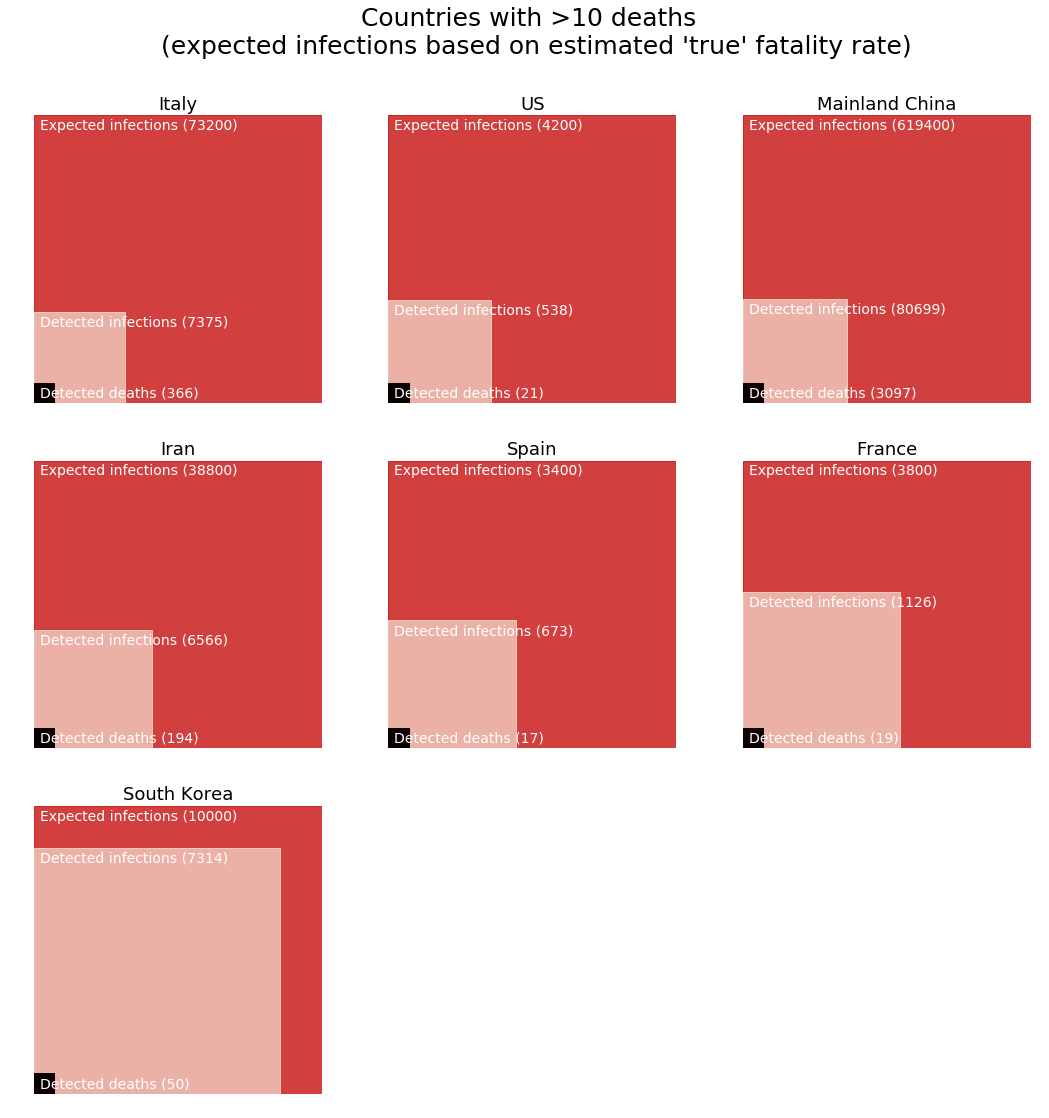

In [42]:
fatality_rate_estimate = 0.005

square_plot_array(data_deaths, 
                  data_deaths.index.tolist(), 
                  fatality_rate_estimate, 
                  n_x = 3, 
                  main_title="Countries with >10 deaths \n (expected infections based on estimated 'true' fatality rate)")